# Ejercicio 1
Calcular SVD de la matriz A = [[1,2],[2,3]] utilizando librería Numpy


In [5]:
import numpy as np

#Cremos matriz A utilizando librería Numpy
A = np.matrix([[1,2],[2,3]])

#U: vector unitario ortogonal 
#S: matriz diagonal de valores singulares (sigma)
#Vt: vector unitario ortogonal transpuesto
U, S, Vt = np.linalg.svd(A)
print(U, S, Vt)

#Comprobamos que A = U*SIGMA*V^T
ComputedA = np.dot(U, np.dot(np.diag(S), Vt))
print (ComputedA)


[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]] [4.23606798 0.23606798] [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]
[[1. 2.]
 [2. 3.]]


## Función para generar vectores

Definí una función que genera vectores de largo *length*. Inician en el origen (0,0) y el primer vector inicia en ángulo 0. Los siguientes son idénticos, solo que se van rotando *step* grados hasta acabar en 360 grados (completar una vuelta).

In [6]:
def genereteCircularVectors(length, step):
    angle = 0
    vectors = []
    while angle < 360:
        vector = [length,0]
        #Convertimos de grados a radianes
        radianAngle = np.radians(angle)
        #Usamos la matriz de rotación para girar el vector
        rotationMatrix = np.array([ 
            [np.cos(radianAngle), -np.sin(radianAngle)], 
            [np.sin(radianAngle),  np.cos(radianAngle)]
            ])
        rotatedVector = np.matmul(vector, rotationMatrix)
        vectors.append(rotatedVector)
        #print("Vector {0} rotated {1}° is {2}".format(vector, angle, rotatedVector))
        angle += step
    return vectors


## Graficar vectores resultantes

Utilizando Matplotlib, graficó los vectores para simular un círculo de largo 1.
A cada vector se le aplicará primero Vt, después S y finalmente U.

(-4.0, 4.0)

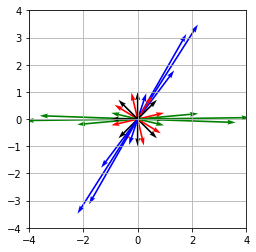

In [64]:
import matplotlib.pyplot as plt

#Generamos vectores al rededor del círculo, con largo 1 e incrementos de 15º grados
vectors = genereteCircularVectors(1, 45)
origin = [0],[0]

fig, ax = plt.subplots()
for ve in vectors:
    #Vector original: negro
    q = ax.quiver(0, 0, ve[0], ve[1], color=['black'], scale = 1, units='xy' )

    #Vector original aplicando Vt: rojo
    #Produce una rotación de los vectores negros, sin modificar dimensiones.
    vet = np.dot(ve, Vt)
    qvt=ax.quiver(0,0, vet[0,0], vet[0,1], color=['red'], scale=1, units = 'xy' )

    #Vector original aplicando Vt y después S: verde
    #Aplana los vectores rojos a lo largo de eje X y los alarga.
    vets = np.dot(vet, np.diag(S))    
    qvts=ax.quiver(0,0, vets[0,0], vets[0,1], color=['green'], scale=1, units = 'xy' )

    #Vector original aplicando Vt, después S, y finalmente U: azul
    #Los vectores verdes de voltean, como efecto espejo y se rotan para llegar a su posición final.
    vetsu = np.dot(vets, U)
    qvts=ax.quiver(0,0, vetsu[0,0], vetsu[0,1], color=['blue'], scale=1, units = 'xy' )

ax.set_aspect('equal')
plt.grid()
plt.xlim(-4,4)
plt.ylim(-4,4)




Ahora aplicaremos la matriz A directamente a los vectores y ver el resultado, el cual debe ser exactamente igual a la imagen anterior.

(-4.0, 4.0)

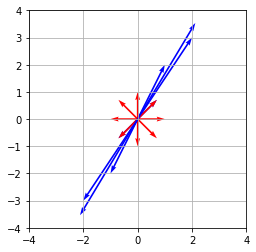

In [71]:
fig, ax = plt.subplots()
for ve in vectors:
    qv=ax.quiver(0,0, ve[0], ve[1], color=['red'], scale=1, units = 'xy' )
    va = np.dot(A, ve) 
    q2=ax.quiver(0,0, va[0,0], va[0,1], color=['blue'], scale=1, units = 'xy' )

ax.set_aspect('equal')
plt.grid()
plt.xlim(-4,4)
plt.ylim(-4,4)

## Calcular matriz de rank 1 que mejor se aproxime a A
Vamos a aproximar A con k = 1. 
Comos los componentes ya están acomodados por orden de importancia, nos quedamos con el primer componente. De tal forma que la matriz Ak es la de mejor aproximación a A.

Ak = Uk x Sk x Vtk

In [153]:
k = 1 

#Nos quedamos con columna K
Uk = U[:,:k]
print('U= ',U, 'Uk= ', Uk)

#Nos quedamos con diagonal K x K
Sk = np.diag(S)[:k, :k]
print('S= ',S, 'diag(S)= ', np.diag(S), 'Sk= ', Sk)

#Nos quedamos con renglón K
Vk = Vt[:k,:]
print('Vt= ', Vt, 'Vk= ', Vk)

Ak = np.dot(Uk, (np.dot(Sk, Vk)))
print('Ak2 = ', Ak)


U=  [[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]] Uk=  [[-0.52573111]
 [-0.85065081]]
S=  [4.23606798 0.23606798] diag(S)=  [[4.23606798 0.        ]
 [0.         0.23606798]] Sk=  [[4.23606798]]
Vt=  [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]] Vk=  [[-0.52573111 -0.85065081]]
Ak2 =  [[1.17082039 1.89442719]
 [1.89442719 3.06524758]]
